<font size="6" color="white">ch4. 머신러닝 모형 최적화</font>
# 1절. 변수 선택과 차원 축소

## 1-1. 변수 선택과 차원 축소
- 종속변수에 영향을 주는 변수들만 찾아 학습에 사용할 독립변수의 수를 줄이는 게 목적
- 어떻게 하면 score를 높일 수 있을지가 목적
- 과적합과 독립변수들 사이의 다중공전성을 줄일 수 있음
- 모형의 학습시간을 줄일 수 있음
- 주성분분석, 상관분석, 분류모형의 feature_importance_, SelectKBest .. 등 이용

## 1-2 주성분분석(PCA, Principal component Anaysis)
- 상관관계가 있는 변수들을 선형결합해서 상관관계가 없는 새로운 변수(주성분)로 축약하는 것

In [1]:
# import list
import seaborn as sns
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.datasets import load_iris, load_digits, make_classification
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:, :-1], iris.species
iris_X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
pca = PCA(n_components=2)# 주성분 갯수
pca.fit(iris_X)
iris_pca = pca.transform(iris_X)
iris_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [4]:
pca.explained_variance_ # 설명분산: 실제 변수의 분산값

array([4.22824171, 0.24267075])

In [5]:
# 설명분산 : 0~1 사이의 비율로 나타낸 값 => 설명정도
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [6]:
# 각 주성분의 계수 
pca.components_
# x1 = 0.36138659*sl -0.08452251*sw + 0.85667061*pl + 0.3582892*sw

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [7]:
iris_X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## 1-3 상관관계 확인
- 종속변수와 상관관계가 높은 변수들과 독립변수들 끼리의 상관관계를 탐색

In [8]:
redwine = pd.read_csv('winequality-red.csv', delimiter=';') # sep=';'
redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


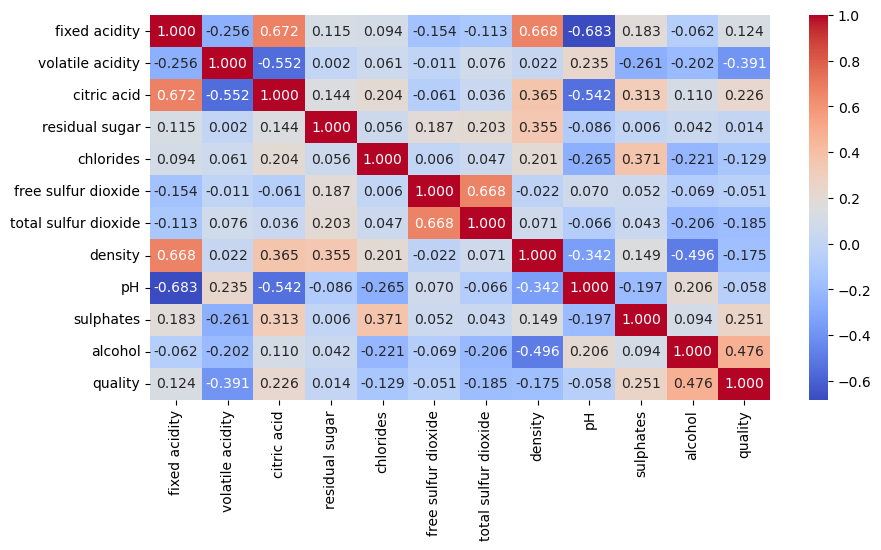

In [9]:
corr = redwine.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm',
            fmt='.3f')
plt.show()

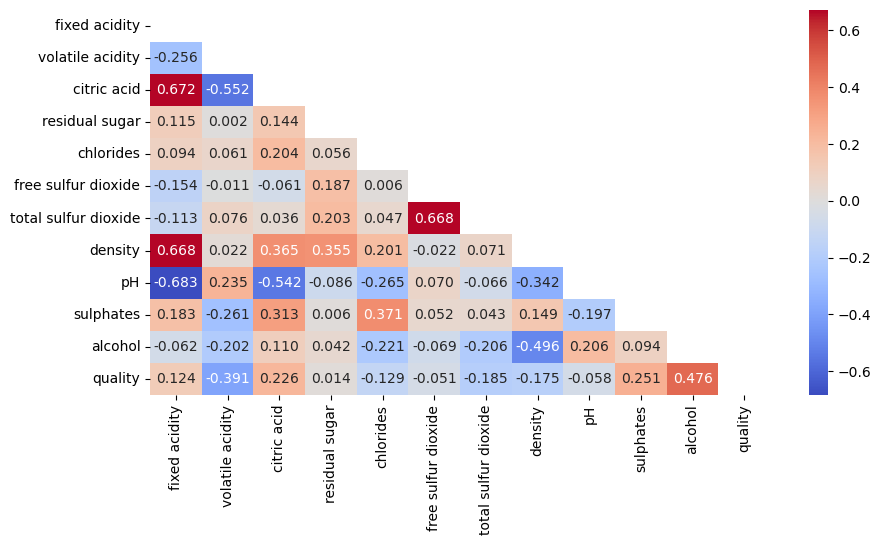

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(corr, 
            annot=True, 
            cmap='coolwarm',
            fmt='.3f',
            mask=mask)
plt.show()

## 1-4 분류모형의 feature_importances_
- 분류모형의 feature_importances_ 속성은 각 독립변수들이 종속변수에 영향을 주는 정도

In [11]:
X = redwine.iloc[:, :-1]
y = redwine.quality
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [12]:
rf_model = RandomForestClassifier(n_estimators=10, # 의사결정나무 갯수
                                  random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [13]:
rf_model.feature_importances_

array([0.0796679 , 0.09869659, 0.07494449, 0.07180637, 0.08817123,
       0.06924251, 0.10174211, 0.07792372, 0.07064598, 0.1074204 ,
       0.1597387 ])

In [14]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [15]:
features = pd.DataFrame(data = np.c_[X.columns, rf_model.feature_importances_],
                        columns=['feature', 'importance'])
features.sort_values(by='importance', 
                     ascending=False,
                     inplace=True)
features.reset_index(drop=True,
                     inplace=True)
features.set_index(drop=True, 
                   keys='feature')

,importance
feature,
alcohol,0.159739
sulphates,0.10742
total sulfur dioxide,0.101742
volatile acidity,0.098697
chlorides,0.088171
fixed acidity,0.079668
density,0.077924
citric acid,0.074944
residual sugar,0.071806


In [16]:
features

,feature,importance
0,alcohol,0.159739
1,sulphates,0.10742
2,total sulfur dioxide,0.101742
3,volatile acidity,0.098697
4,chlorides,0.088171
5,fixed acidity,0.079668
6,density,0.077924
7,citric acid,0.074944
8,residual sugar,0.071806
9,pH,0.070646


### feature_importance_를 이용한 변수 중요도 시각화

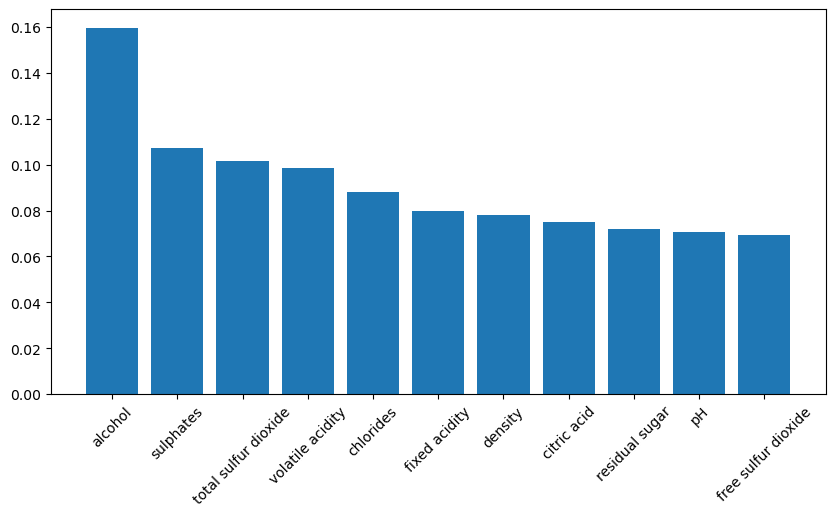

In [17]:
plt.figure(figsize=(10,5))
plt.bar(features.feature,
        features.importance)
plt.xticks(rotation=45)
plt.show()

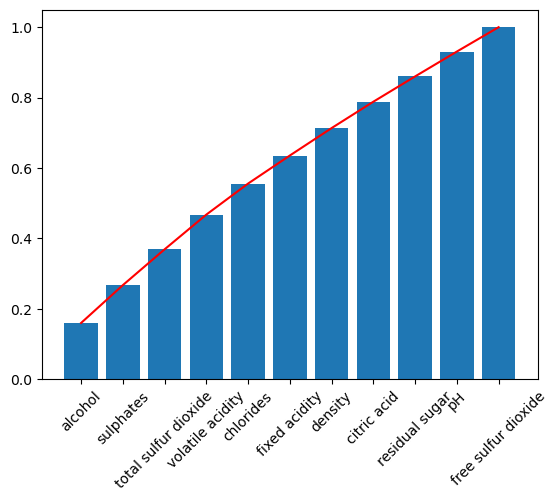

In [18]:
# feature_importance_를 누적한 시각화
# np.c_[features.importance, np.cumsum(features.importance)]
y_stack = np.cumsum(features.importance)
plt.bar(features.feature,
        y_stack)
plt.plot(features.feature,
         y_stack,
         color='red')
plt.xticks(rotation=45)
plt.show()

### RFE(Recursive Feature Elimination) 방식
- RFE클래스를 이용하면 중요도가 낮은 변수부터 하나씩 제거해 나가면서 최종적으로 선택하고자 하는 변수의 갯수만큼 중요도가 높은 변수를 찾는다(재귀적 특징 제거)

In [19]:
# feature_importance_  5개 특징이 남을 때 까지 하나씩 제거
# 순위는 알수없고 선택된 특징만 알수 있음
rfe_model = RFE(RandomForestClassifier(n_estimators=10,
                                       random_state=10),
                n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [20]:
rfe_model.get_support() # 선택된 변수인지 여부

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [21]:
X.columns[rfe_model.get_support()] # 선택된 변수들

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')

In [22]:
# 선택된 변수와 선택되지 못한 변수 꼭 봐야할까?
features_rfe = pd.DataFrame(data=np.c_[X.columns,
                                       rfe_model.get_support()],
                            columns=['feature', 'selected'])
features_rfe.sort_values(by='selected',
                         ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
7,density,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


## 1-5 SelectKBest
- 가장 높은 통계 score에 따라 K개 특징 선택

In [23]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape, y[0]

((150, 4), (150,), 0)

In [24]:
# y = 범주형, X = 연속형 일때 적합한 통계량은 chi2
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

In [25]:
X_new[:2]

array([[1.4, 0.2],
       [1.4, 0.2]])

In [26]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

# 2절. 파라미터 탐색
- 하이퍼파라미터(사용자가 직접 설정할수 있는 파라미터)
- 머신러닝 모형이 완성되었을 때 최고의 성능을 내기위한 파라미터 튜닝
- 모형 최적화

## 2-1 validation_curve
- 최적화 할 파라미터 이름과 범위, 성능기준을 각각 param_name, param_range, scoring 인수로 받아
- 모든 경우에 대해 성능을 계산

In [27]:
digits = load_digits()
# digits.data : (1797x64) 크기의 배열
# digits.images[0]
X, y = digits.data, digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [28]:
np.all(digits.data[0].reshape(8,8) == digits.images[0])

True

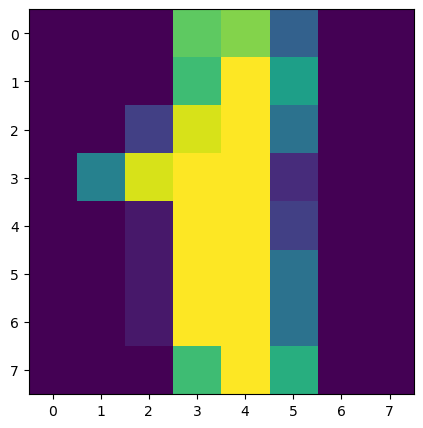

In [29]:
plt.figure(figsize=(5,5))
plt.imshow(X[1].reshape(8,8))
plt.show()

In [30]:
model = SVC(probability=True).fit(X, y) # SVC가 판별모형이나 probability=True proba 함수

In [31]:
model.predict(X[0].reshape(1, -1))

array([0])

In [32]:
# param_range = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

In [33]:
# valitation_curve 함수를 이용해서 성능이 제일 좋은 파라미터값 도출
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [34]:
%%time
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(SVC(),
                                            X, y,
                                            param_name='gamma',
                                            param_range=param_range,
                                            cv=10,
                                            scoring='accuracy',
                                            n_jobs=-1)
# cv=10 : 교차검증 10개중 9개는 train, 1개는 test

CPU times: total: 359 ms
Wall time: 14.4 s


In [35]:
train_scores.shape, test_scores.shape

((10, 10), (10, 10))

In [36]:
train_score_mean = np.mean(train_scores, axis=1) # train 평균
train_score_std = np.std(train_scores, axis=1) # train score 표준편차
test_score_mean = np.mean(test_scores, axis=1) # test score 평균
test_score_std = np.std(test_scores, axis=1) # test 표준편차

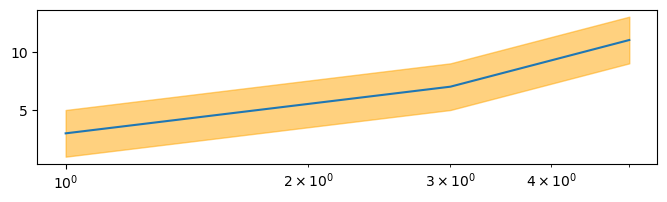

In [37]:
a = np.array([1,3,5])
b = np.array([3,7,11])
plt.figure(figsize=(8,2))
plt.semilogx(a, b)
plt.fill_between(a, b-2, b+2, alpha=0.5, color="orange")

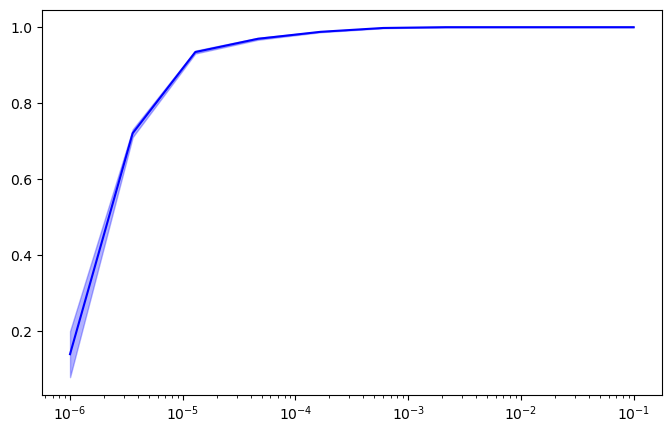

In [38]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range,
             train_score_mean,
             label="train score",
             color='blue')
plt.fill_between(param_range,
                 train_score_mean-train_score_std,
                 train_score_mean+train_score_std,
                 alpha=0.3,
                 color="blue")

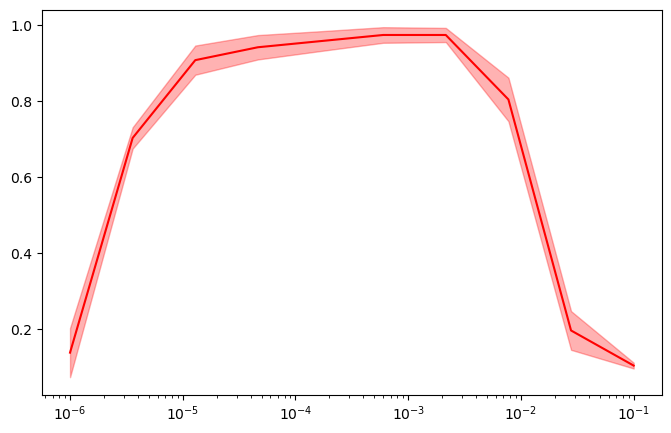

In [39]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range,
             test_score_mean,
             label="test score",
             color='red')
plt.fill_between(param_range,
                 test_score_mean-test_score_std,
                 test_score_mean+test_score_std,
                 alpha=0.3,
                 color="red")

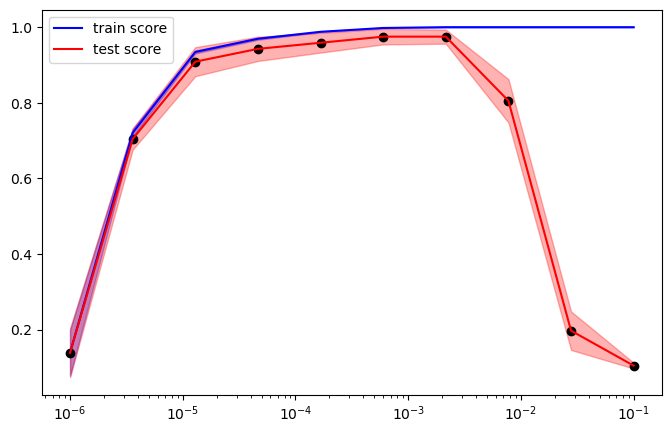

In [40]:
plt.figure(figsize=(8,5))
plt.semilogx(param_range,
             train_score_mean,
             label="train score",
             color='blue')
plt.fill_between(param_range,
                 train_score_mean-train_score_std,
                 train_score_mean+train_score_std,
                 alpha=0.3,
                 color="blue")
plt.semilogx(param_range,
             test_score_mean,
             label="test score",
             color='red')
plt.fill_between(param_range,
                 test_score_mean-test_score_std,
                 test_score_mean+test_score_std,
                 alpha=0.3,
                 color="red")
plt.scatter(param_range, test_score_mean, c='k')
plt.legend(loc='best')
plt.show()

In [41]:
best_gamma = param_range[test_score_mean.argmax()]
model = SVC(gamma=best_gamma).fit(X,y)

In [42]:
model.score(X, y)

1.0

## 2-2 GridSearchCV
- 복수의 하이퍼파라미터 최적화 클래스
- validation_curve함수와 달리 모형 랩퍼 성격의 클래스(최적의 모형을 가지고 있음)
- fit(), predict(), predict_proba(), decision_function(), score()

In [43]:
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.quality
redwine_X.shape, redwine_y.shape

((1599, 11), (1599,))

In [44]:
%%time
selection = SelectKBest(k=1) # 가장 평가 점수가 높은 k를 찾음
svc = SVC(kernel='linear') # 가장평가 점수가 높은 C를 찾음
pipeline = Pipeline([('select', selection),
                     ('svc', svc)])
param_grid = dict(select__k=[4, 5, 6, 7, 8, 9, 10, 11],
                 svc__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           cv=2,
                           verbose=10,
                           n_jobs=-1)
grid_search.fit(redwine_X.values, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
CPU times: total: 16.3 s
Wall time: 2min 20s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('select', SelectKBest(k=1)),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'select__k': [4, 5, 6, 7, 8, 9, 10, 11],
                         'svc__C': [0.1, 1, 10]},
             verbose=10)

In [45]:
print('최적의 파라미터 정보 :', grid_search.best_params_)

최적의 파라미터 정보 : {'select__k': 9, 'svc__C': 1}


In [46]:
model = grid_search.best_estimator_

In [47]:
model.predict(redwine_X.loc[0].values.reshape(1, -1))

array([5], dtype=int64)

In [48]:
model.decision_function(redwine_X.loc[0].values.reshape(1, -1))

array([[ 0.81364186,  3.26057499,  5.29857403,  4.24990592,  1.73386464,
        -0.30285909]])

In [49]:
model.score(redwine_X.values, redwine_y)

0.5878674171357098

In [50]:
model = SVC().fit(redwine_X, redwine_y)
model.score(redwine_X)

TypeError: ClassifierMixin.score() missing 1 required positional argument: 'y'

# 3절. 자료 불균형 처리
- 언더샘플링/오버샘플링
- 오버샘플링은 train 데이터에만
- SMOTE를 이용한 오버샘플링 / 모형생성시 특정 파라미터로 설정

## 3-1 SMOTE를 이용한 오버샘플링 전

In [51]:
X, y = make_classification(n_samples=10000, # 데이터 size
                           n_features=10, # 독립변수 수
                           n_informative=5, # 종속변수와 상관관계 있는 독립변수 수
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=2,
                           random_state=42,
                           weights=[0.99, 0.01]) # 각 클래스의 할당된 표본 수 비율
X.shape, y.shape, y.mean()

((10000, 10), (10000,), 0.014)

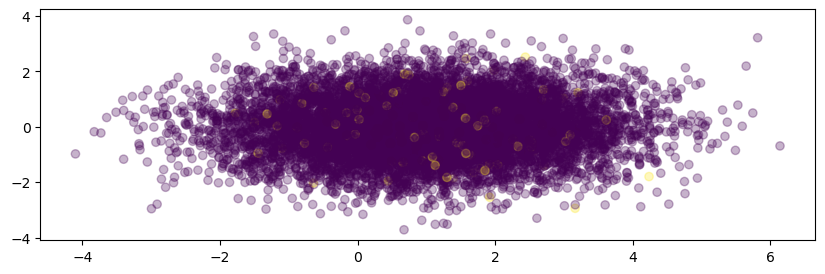

In [52]:
plt.figure(figsize=(10,3))
plt.scatter(X[:,0],
            X[:,1],
            c=y,
            alpha=0.3)
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.mean(), y_test.mean()

((7000, 10), (3000, 10), 0.014, 0.014)

In [54]:
rf_model = RandomForestClassifier(n_estimators=100, # 학습시 생성될 의사결정나무 갯수
                                  max_features=2, # 노드 분할시 사용할 특징 최대 수
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=42)

In [55]:
pred = rf_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[2958,    0],
       [  34,    8]], dtype=int64)

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-2 가중치 제어를 통한 모형 생성

In [57]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_features=2,
                                  class_weight={0:1, 1:1.5},
                                  random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 1.5}, max_features=2,
                       random_state=42)

In [58]:
pred = rf_model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.19      0.32        42

    accuracy                           0.99      3000
   macro avg       0.99      0.60      0.66      3000
weighted avg       0.99      0.99      0.98      3000



## 3-3 SMOTE를 이용한 오버샘플링후
- pip install imbleam

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape

((13804, 10), (13804,))

In [61]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  max_features=2,
                                  random_state=42)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(max_features=2, random_state=42)

In [62]:
pred = rf_model.predict(X_test)
confusion_matrix(y_test, pred)

array([[2955,    3],
       [  28,   14]], dtype=int64)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.82      0.33      0.47        42

    accuracy                           0.99      3000
   macro avg       0.91      0.67      0.73      3000
weighted avg       0.99      0.99      0.99      3000



# 4절. 최적 모형 탐색 (앙상블 모형)
- 여러분류모델을 하나의 메타 분류모델로 연결해서 하나의 분류모델보다 더 좋은 성능을 달성
1. 한가지 분류 알고리즘을 이용
- 배깅 (학습 잘 된 모델에 점수)
- 부스팅(학습이 안 된 데이터에 가중치)
2. 여러가지 분류 알고리즘을 이용
- 투표방식(hard 방식 vs. soft방식)

## cf 배깅 알고리즘 시 0.632규칙(pt.36)

In [64]:
len(set(np.random.choice(10, 10))) # 10미만의수를 100개 복원추출로 choice

8

In [65]:
N = 100
data = np.random.choice(N, N)
cnt = len(set(data))
print('추출된 데이터 갯수 : {}, 비율 : {:.3f}'.format(cnt,cnt/N))
print('추출되지 않는 데이터 갯수 : {}, 비율 : {:.3f}'.format(N - cnt, (N-cnt)/N))

추출된 데이터 갯수 : 65, 비율 : 0.650
추출되지 않는 데이터 갯수 : 35, 비율 : 0.350


## 4-1 배깅 반식
- BaggingClassifier, RandomforesetClassifier

In [66]:
wine_df = pd.read_csv('wine.csv')
wine_df['Class label'].unique()
wine_df.sample()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
32,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990


In [67]:
X = wine_df.iloc[:, 1:].values
y = wine_df['Class label']

In [68]:
train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)

In [69]:
# 의사 결정 나무 알고리즘
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1)
tree.fit(train_X, train_y)
tree.score(test_X, test_y)

0.9074074074074074

In [70]:
# 배깅 알고리즘
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(estimator=tree,
                        n_estimators=500,
                        bootstrap=True, # 복원추출 중복추출 허용
                        bootstrap_features=False, # 모든 특성을 사용해서 학습
                        random_state=1)
bag.fit(train_X, train_y)
bag.score(test_X, test_y)

0.9629629629629629

In [71]:
# 랜덤 포레스트 알고리즘
rf = RandomForestClassifier().fit(train_X, train_y)
rf.score(test_X, test_y)

1.0

## 4-2 임의의 데이터를 만들어 최적 모형 탐색

In [72]:
X, y = make_classification(n_samples=10000, 
                           n_features=10, 
                           n_informative=5, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           n_classes=2, 
                           weights=[0.9, 0.1], 
                           random_state=42)

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
print(resampled_X.shape, resampled_y.shape)

(7000, 10) (3000, 10) (7000,) (3000,)
(12556, 10) (12556,)


In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y, test_X=test_X, test_y=test_y):
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    accuracy  = model.score(test_X, test_y)
    precision = precision_score(test_y, pred)
    recall    = recall_score(test_y, pred)
    f1score  = f1_score(test_y, pred)
    return '정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1_score:{:.3f}'.format(accuracy, precision, recall, f1score)

In [75]:
from sklearn.svm import SVC
model_measure(SVC())

'정확도:0.989, 정밀도:0.963, 재현율:0.929, f1_score:0.946'

In [76]:
model_measure(RandomForestClassifier())

'정확도:0.984, 정밀도:0.942, 재현율:0.900, f1_score:0.921'

In [77]:
from sklearn.neural_network import MLPClassifier
model_measure(MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500))

'정확도:0.982, 정밀도:0.915, 재현율:0.906, f1_score:0.911'

## 4-3 부스팅 방식

In [78]:
# pip install xgboost
from xgboost import XGBClassifier
model_measure(XGBClassifier())

'정확도:0.986, 정밀도:0.953, 재현율:0.909, f1_score:0.930'

In [85]:
# pip install lightgbm
from lightgbm import LGBMClassifier
model_measure(LGBMClassifier(force_row_wise=True))

[LightGBM] [Info] Number of positive: 6278, number of negative: 6278
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 12556, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


'정확도:0.986, 정밀도:0.953, 재현율:0.913, f1_score:0.932'

In [80]:
from sklearn.ensemble import AdaBoostClassifier
model_measure(AdaBoostClassifier())

'정확도:0.960, 정밀도:0.749, 재현율:0.916, f1_score:0.824'

## 4-4 투표를 이용한 앙상블 (pt62~63)
- hard방식 (pt. 62)
- soft방식 (pt. 63)

In [81]:
X, y = make_classification(n_samples=10000, 
                           n_features=10, 
                           n_informative=5, 
                           n_redundant=0, 
                           n_clusters_per_class=1, 
                           n_classes=2, 
                           weights=[0.9, 0.1], 
                           random_state=42)

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=42)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
print(resampled_X.shape, resampled_y.shape)

(7000, 10) (3000, 10) (7000,) (3000,)
(12556, 10) (12556,)


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score
def model_measure(model, train_X=resampled_X, train_y=resampled_y, test_X=test_X, test_y=test_y):
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    accuracy  = model.score(test_X, test_y)
    precision = precision_score(test_y, pred)
    recall    = recall_score(test_y, pred)
    f1score  = f1_score(test_y, pred)
    return '정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}, f1_score:{:.3f}'.format(accuracy, precision, recall, f1score)

In [86]:
rf_model = RandomForestClassifier(max_features=2,
                                  random_state=42)
xgb_model = XGBClassifier(max_depth=10, # 트리의 최대 깊이
                          n_estimators=100, # 트리 갯수
                          learning_rate=0.01, # 학습률
                          eval_metric='logloss', # 평가지표(이진분류에서 주류)
                          )
lgbm_model = LGBMClassifier(force_row_wise=True,
                            verbose=-1)
print(model_measure(rf_model))
print(model_measure(xgb_model))
print(model_measure(lgbm_model))

정확도:0.980, 정밀도:0.916, 재현율:0.887, f1_score:0.901
정확도:0.971, 정밀도:0.833, 재현율:0.903, f1_score:0.866
정확도:0.986, 정밀도:0.953, 재현율:0.913, f1_score:0.932


In [89]:
# voting 알고리즘 (hard 방식 / soft방식)
# hard방식
from sklearn.ensemble import VotingClassifier
voting_model = VotingClassifier(estimators=[('rfm', rf_model),
                                            ('xgb', xgb_model),
                                            ('lgbm', lgbm_model)],
                                voting='hard') # VotingClassifier : voting='hard' 기본값
voting_model.fit(resampled_X, resampled_y)

VotingClassifier(estimators=[('rfm',
                              RandomForestClassifier(max_features=2,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_polic...
                                            interaction_constraints=None,
                                            learning_rate=0.01, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgbm',
                              LGBMClassifier(force_row_wise=True, verbose=-1))])

In [92]:
voting_model.predict(test_X[0].reshape(1,-1))

array([0])

In [93]:
test_y

array([0, 1, 0, ..., 0, 0, 0])

In [95]:
model_measure(voting_model)

'정확도:0.982, 정밀도:0.924, 재현율:0.903, f1_score:0.913'

In [96]:
voting_model.named_estimators_

{'rfm': RandomForestClassifier(max_features=2, random_state=42),
 'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.01, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=100,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...),
 'lgbm': LGBMClassifier(force_row_wise=True, verbose=-1)}

In [98]:
print(model_measure(voting_model.named_estimators_['rfm']))
print(model_measure(voting_model.named_estimators_['xgb']))
print(model_measure(voting_model.named_estimators_['lgbm']))

정확도:0.980, 정밀도:0.916, 재현율:0.887, f1_score:0.901
정확도:0.971, 정밀도:0.833, 재현율:0.903, f1_score:0.866
정확도:0.986, 정밀도:0.953, 재현율:0.913, f1_score:0.932


In [99]:
model = model_measure(voting_model.named_estimators_['lgbm'])

In [100]:
voting_model.get_params() # 모델 내의 모든 파라미터(하이퍼 파라미터)

{'estimators': [('rfm',
   RandomForestClassifier(max_features=2, random_state=42)),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='logloss',
                 feature_types=None, gamma=None, grow_policy=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=0.01, max_bin=None, max_cat_threshold=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, multi_strategy=None, n_estimators=100,
                 n_jobs=None, num_parallel_tree=None, random_state=None, ...)),
  ('lgbm', LGBMClassifier(force_row_wise=True, verbose=-1))],
 'flatten_transform': True,
 'n_jobs': None,
 'v

In [101]:
# soft 방식
voting_model2 = VotingClassifier(estimators=[('rfm', rf_model),
                                             ('xgb', xgb_model),
                                             ('lgbm', lgbm_model)],
                                 voting='soft')
model_measure(voting_model2)

'정확도:0.986, 정밀도:0.946, 재현율:0.913, f1_score:0.929'

# 5절. 머신러닝 모형 저장

In [102]:
# 모형이 작을 때 : pickle 파일로 저장 (간단)

In [103]:
import pickle
# 모델 저장
with open('ch4_votingmodel.pkl', 'wb') as f:
    pickle.dump(voting_model, f)

In [104]:
# 모델 로드
with open('ch4_votingmodel.pkl', 'rb') as f:
    loaded_model =pickle.load(f)

In [105]:
# 모델 사용
model_measure(loaded_model)

'정확도:0.982, 정밀도:0.924, 재현율:0.903, f1_score:0.913'

In [ ]:
# 대용량 모형일 대 : joblib 파일로 저장 (joblib라이브러리)

In [106]:
import joblib
# 모델저장
joblib.dump(voting_model, 'ch4_votingmodel.joblib')

['ch4_votingmodel.joblib']

In [107]:
#모델 로드
loaded_model2 = joblib.load('ch4_votingmodel.joblib')
model_measure(loaded_model2)

'정확도:0.982, 정밀도:0.924, 재현율:0.903, f1_score:0.913'